In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
5/29/20        1022   12531       4607        759         2278      4752   
5/30/20        1047   13018       4739        759         2395      5094   
5/31/20        1056   13463       5087        759         2517      5202   
6/1/20         1084   13837       5336        759         2582      5362   
6/2/20         1105   14095       5586       1118         2653      5527   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
5/29/20               16531      575                  116  2005  
5/30/20               16908      581                  117  2025  
5/31/20               17285      586                  117  2045  
6/1/20                17572      588                  117  2083  
6/2/20                17752      590                  117  2092  

[95 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

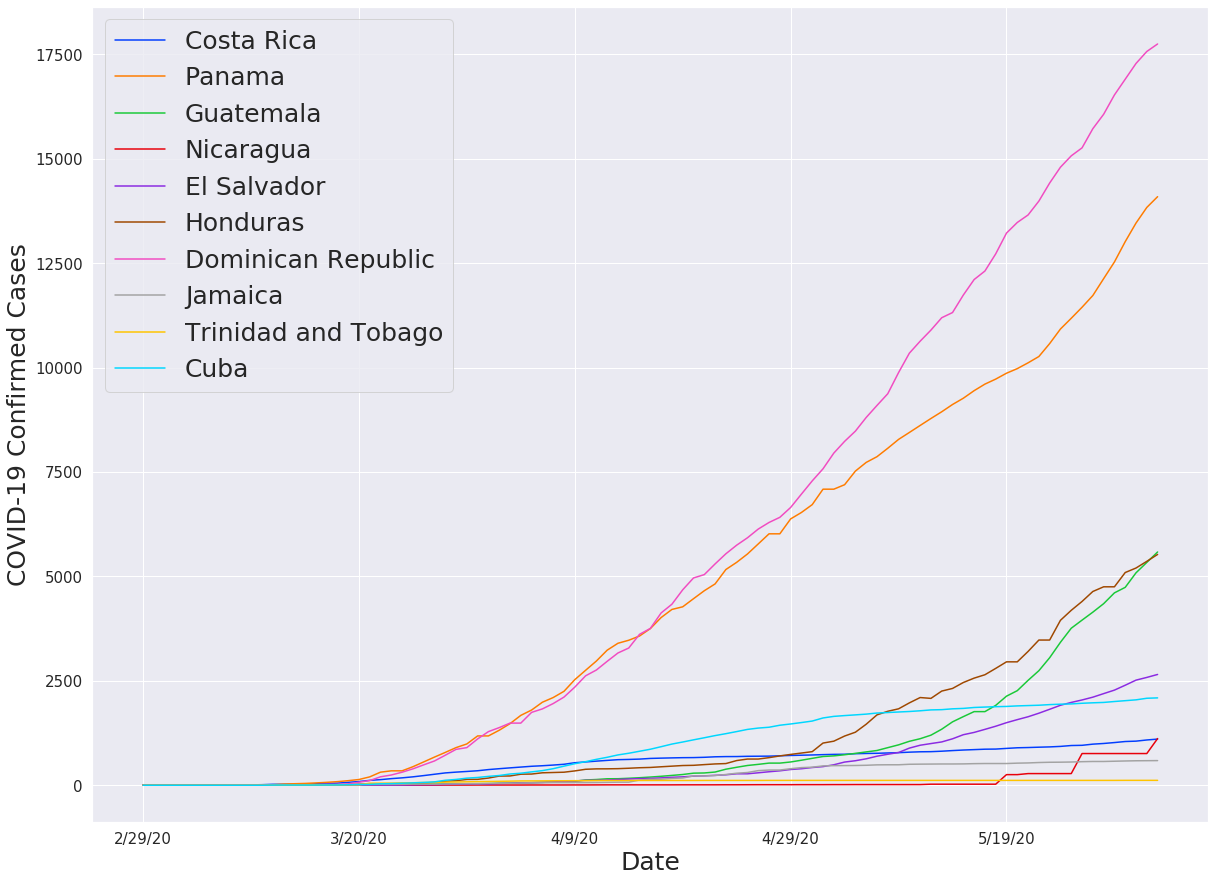

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

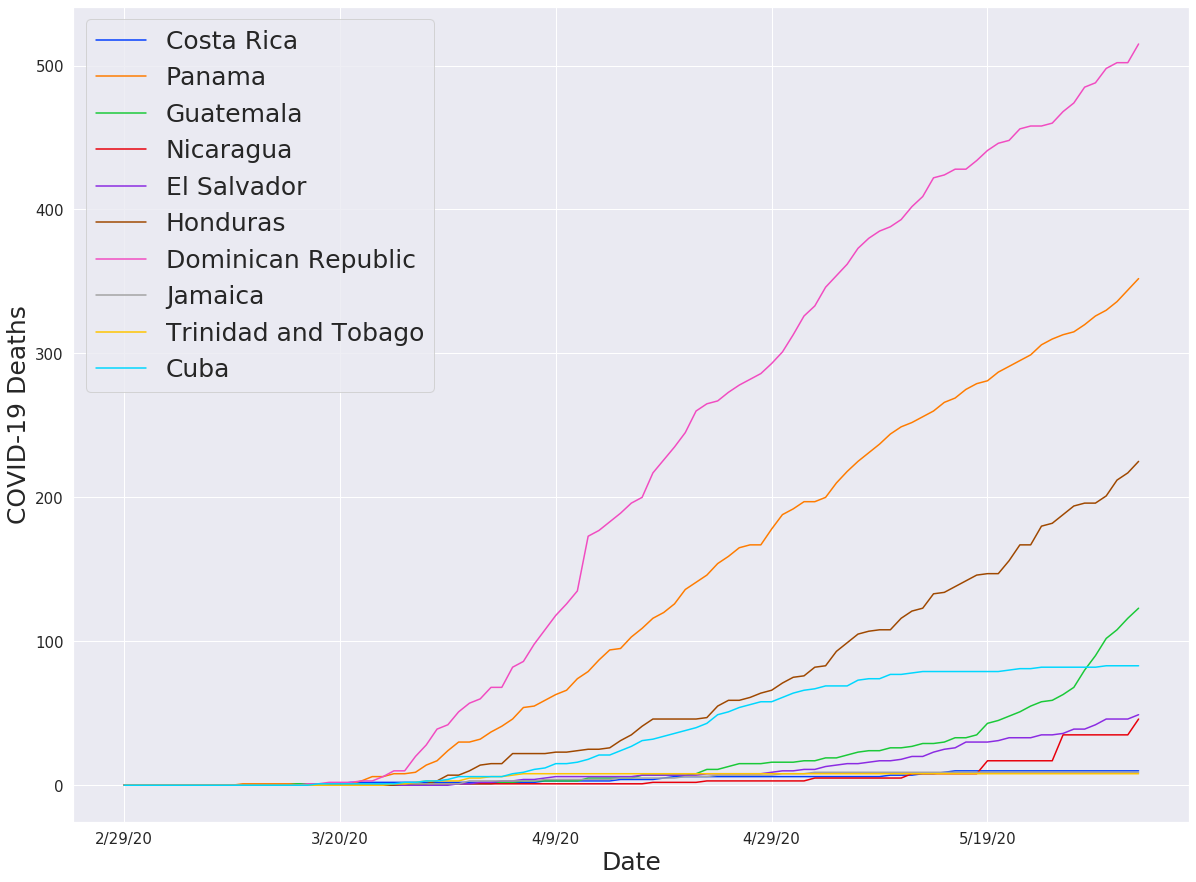

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20          0.0     0.0        0.0        0.0          0.0       0.0   
...             ...     ...        ...        ...          ...       ...   
5/29/20        22.0   400.0      259.0        0.0         84.0       0.0   
5/30/20        25.0   487.0      132.0        0.0        117.0     342.0   
5/31/20         9.0   445.0      348.0        0.0        122.0     108.0   
6/1/20         28.0   374.0      249.0        0.0         65.0     160.0   
6/2/20         21.0   258.0      250.0      359.0         71.0     165.0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                  1.0      0.0                  0.0   0.0  
3/2/20                  0.0      0.0                  0.0   0.0  
3/3/20                  0.0      0.0                  0.0   0.0  
3/4/20                  0.0      0.0                  0.0   0.0  
3/5/20                  0.0      0.0                  0.0   0.0  
...                     ...      ...                  ...   ...  
5/29/20               463.0      6.0                  0.0  22.0  
5/30/20               377.0      6.0                  1.0  20.0  
5/31/20               377.0      5.0                  0.0  20.0  
6/1/20                287.0      2.0                  0.0  38.0  
6/2/20                180.0      2.0                  0.0   9.0  

[94 rows x 10 columns]

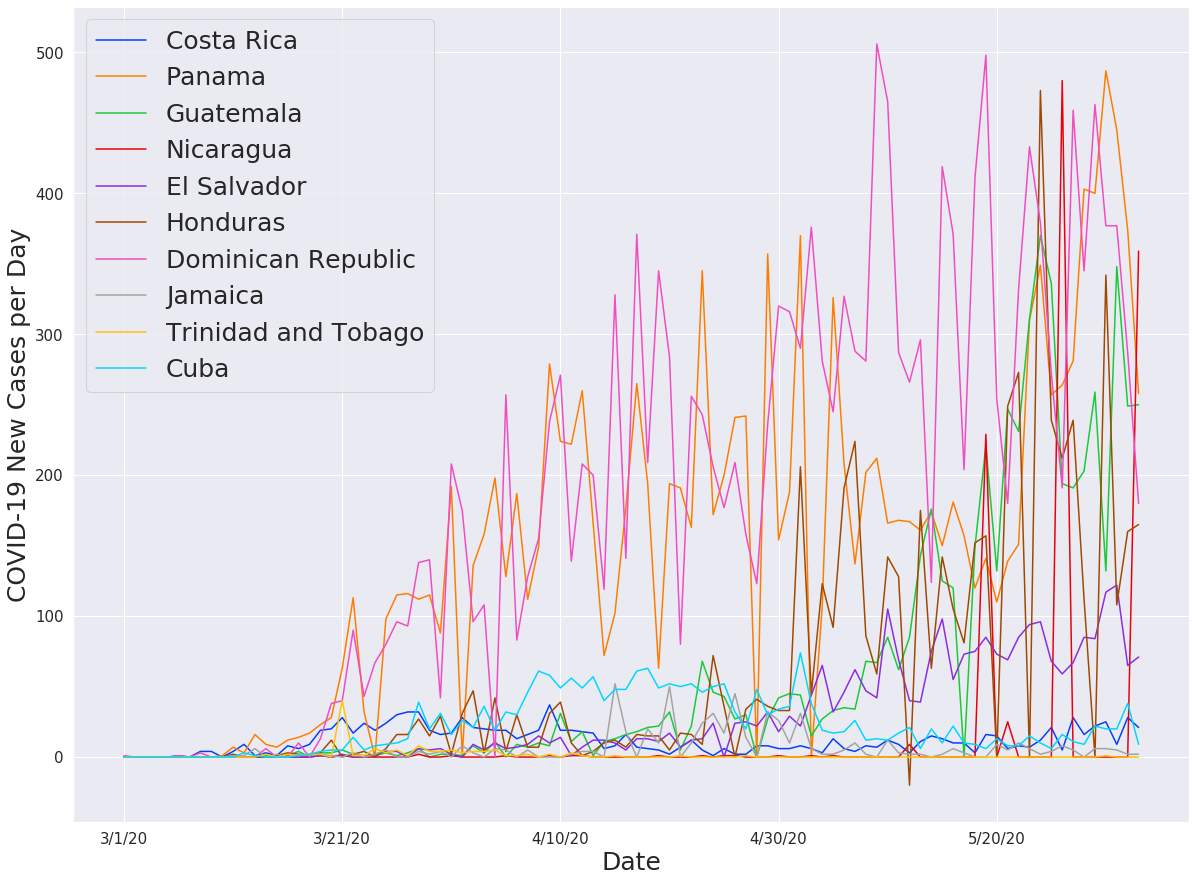

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

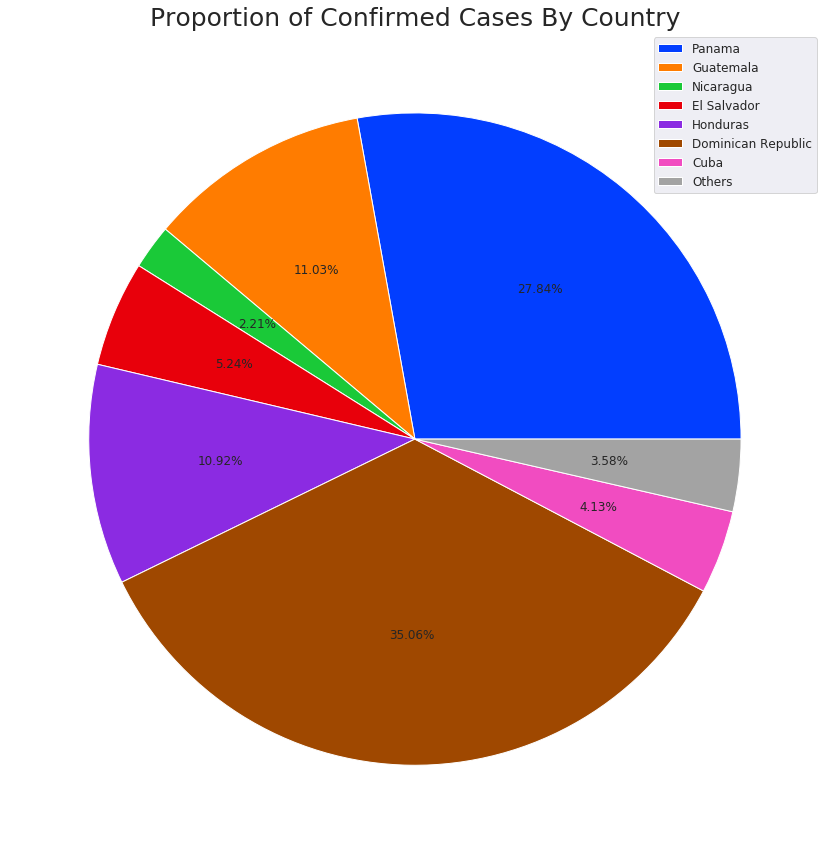

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

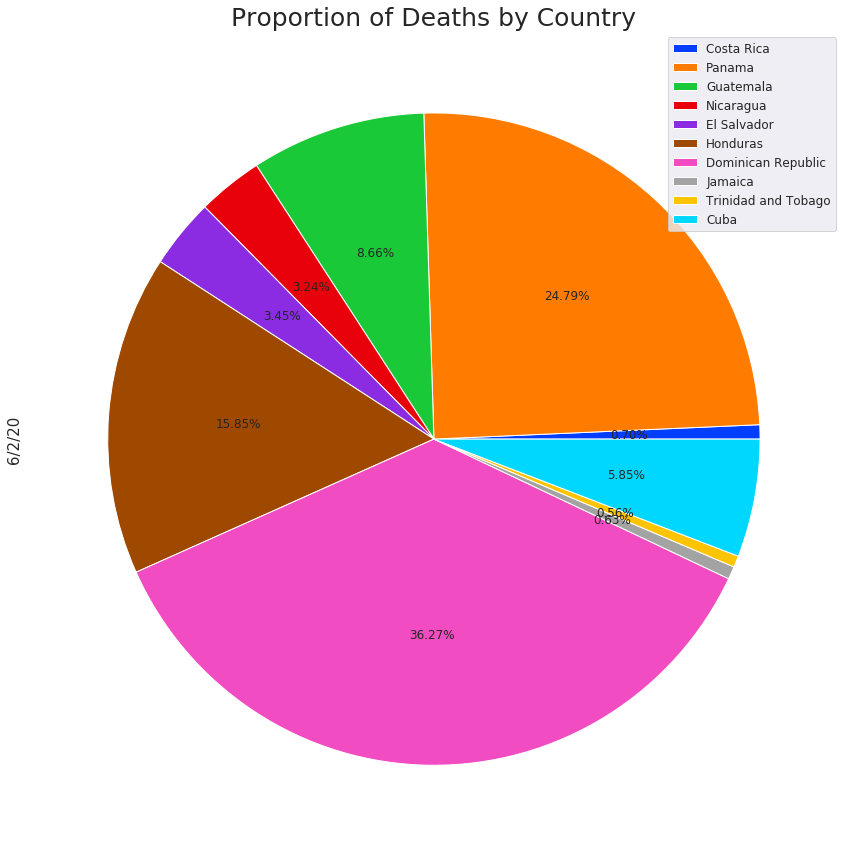

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
5/29/20    1.022000  1.032973   1.059568   1.000000     1.038286  1.000000   
5/30/20    1.024462  1.038864   1.028652   1.000000     1.051361  1.071970   
5/31/20    1.008596  1.034183   1.073433   1.000000     1.050939  1.021201   
6/1/20     1.026515  1.027780   1.048948   1.000000     1.025824  1.030757   
6/2/20     1.019373  1.018646   1.046852   1.472991     1.027498  1.030772   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000             0.000000  0.000000  
3/1/20             0.000000  0.000000             0.000000  0.000000  
3/2/20             1.000000  0.000000             0.000000  0.000000  
3/3/20             1.000000  0.000000             0.000000  0.000000  
3/4/20             1.000000  0.000000             0.000000  0.000000  
...                     ...       ...                  ...       ...  
5/29/20            1.028815  1.010545             1.000000  1.011094  
5/30/20            1.022806  1.010435             1.008621  1.009975  
5/31/20            1.022297  1.008606             1.000000  1.009877  
6/1/20             1.016604  1.003413             1.000000  1.018582  
6/2/20             1.010244  1.003401             1.000000  1.004321  

[95 rows x 10 columns]

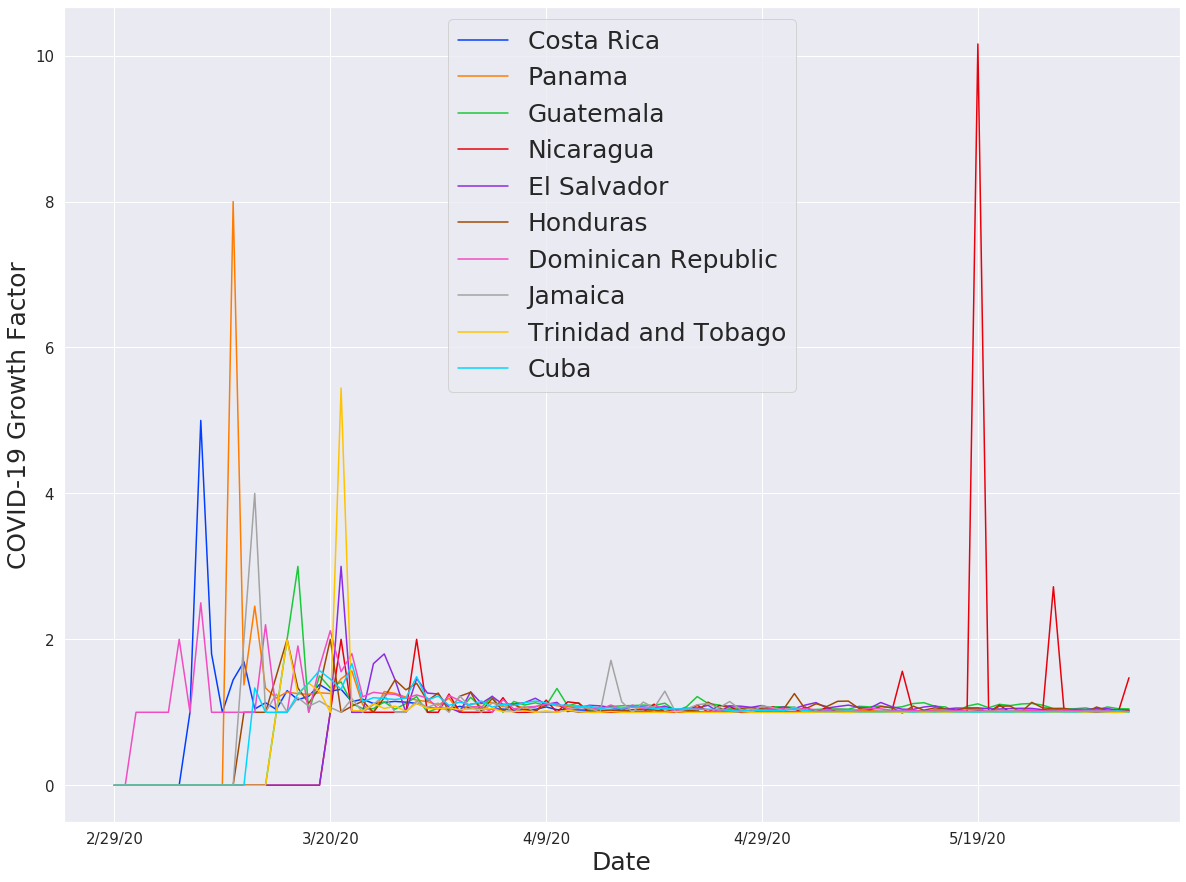

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica     Panama  Guatemala  Nicaragua  El Salvador   Honduras  \
count   95.000000  95.000000  95.000000  95.000000    95.000000  95.000000   
mean     1.033225   1.049493   0.951367   0.952624     0.890442   0.970416   
std      0.514840   0.821950   0.473213   1.078915     0.515455   0.405797   
min      0.000000   0.000000   0.000000   0.000000     0.000000   0.000000   
25%      1.008265   1.017168   1.024059   1.000000     1.000000   1.010386   
50%      1.017007   1.034183   1.068323   1.000000     1.053333   1.042683   
75%      1.050730   1.099953   1.104525   1.000000     1.087860   1.105650   
max      5.000000   8.000000   3.000000  10.160000     3.000000   2.000000   

       Dominican Republic    Jamaica  Trinidad and Tobago       Cuba  
count           95.000000  95.000000            95.000000  95.000000  
mean             1.110122   0.965628             0.918716   0.940841  
std              0.319275   0.494402             0.614434   0.396481  
min              0.000000   0.000000             0.000000   0.000000  
25%              1.018793   1.000000             1.000000   1.004993  
50%              1.037014   1.009452             1.000000   1.020877  
75%              1.078752   1.069971             1.009272   1.094632  
max              2.500000   4.000000             5.444444   1.666667

In [17]:
growth_df.mean()

Costa Rica             1.033225
Panama                 1.049493
Guatemala              0.951367
Nicaragua              0.952624
El Salvador            0.890442
Honduras               0.970416
Dominican Republic     1.110122
Jamaica                0.965628
Trinidad and Tobago    0.918716
Cuba                   0.940841
dtype: float64

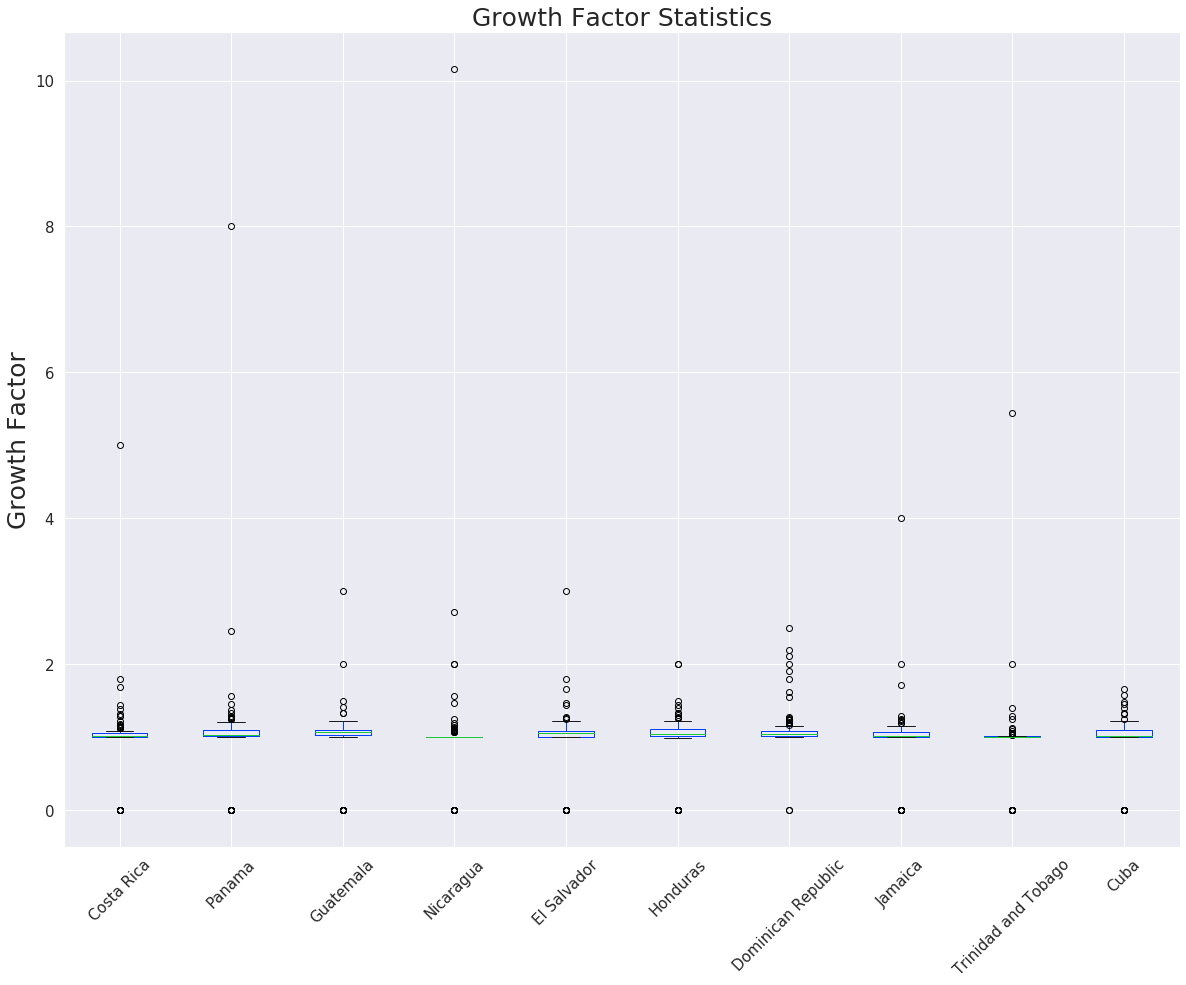

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

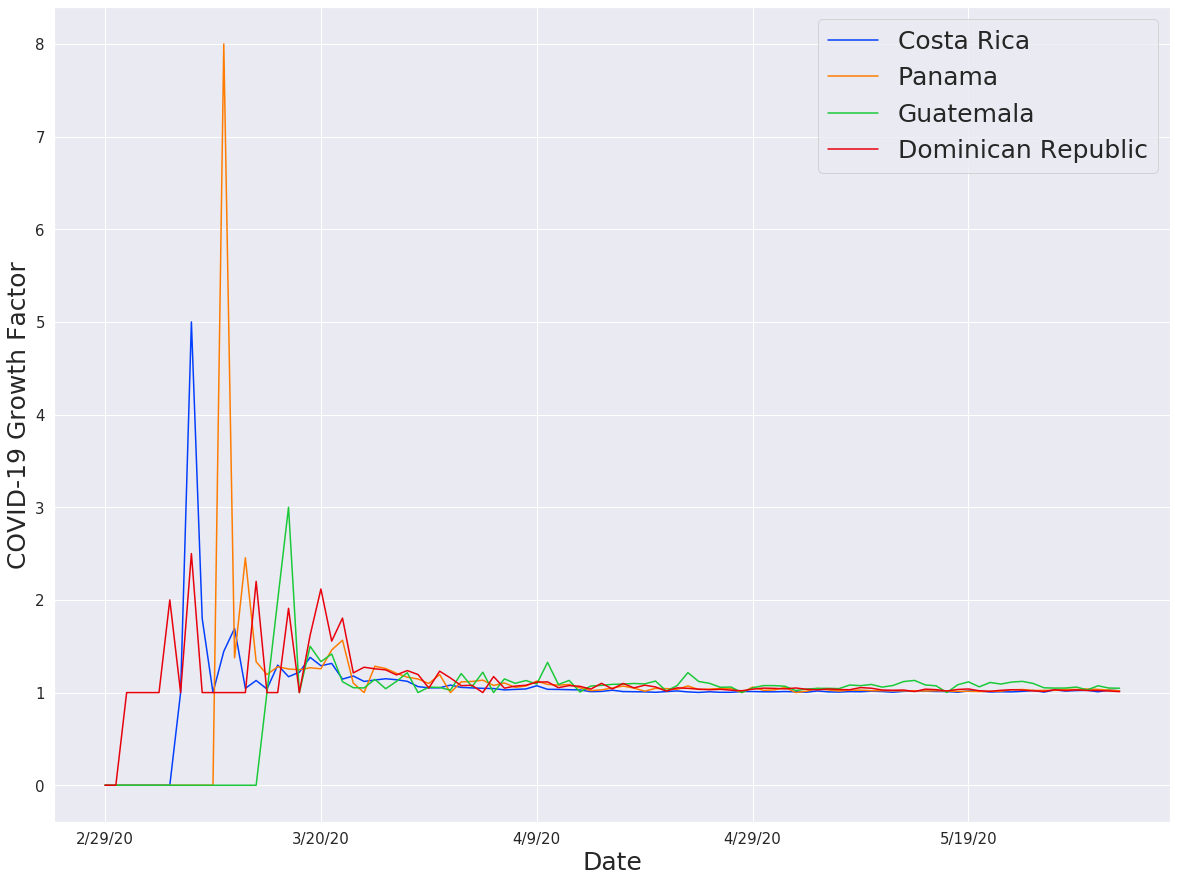

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica     Panama  Guatemala  Nicaragua  El Salvador   Honduras  \
count   88.000000  84.000000  80.000000  75.000000    75.000000  83.000000   
mean     1.115414   1.186927   1.129749   1.206657     1.127893   1.110717   
std      0.440067   0.774629   0.249743   1.080738     0.257030   0.176166   
min      1.000000   1.000000   1.000000   1.000000     1.000000   0.990476   
25%      1.009007   1.020893   1.049744   1.000000     1.044688   1.023814   
50%      1.018440   1.042317   1.075853   1.000000     1.066667   1.051282   
75%      1.052636   1.116360   1.118052   1.033333     1.098300   1.120794   
max      5.000000   8.000000   3.000000  10.160000     3.000000   2.000000   

       Dominican Republic    Jamaica  Trinidad and Tobago       Cuba  
count           93.000000  83.000000            80.000000  82.000000  
mean             1.133996   1.105237             1.090976   1.089999  
std              0.277102   0.352167             0.508824   0.133557  
min              1.000000   1.000000             1.000000   1.000000  
25%              1.019546   1.001701             1.000000   1.008570  
50%              1.037164   1.012959             1.000000   1.039577  
75%              1.079243   1.087059             1.018781   1.108156  
max              2.500000   4.000000             5.444444   1.666667

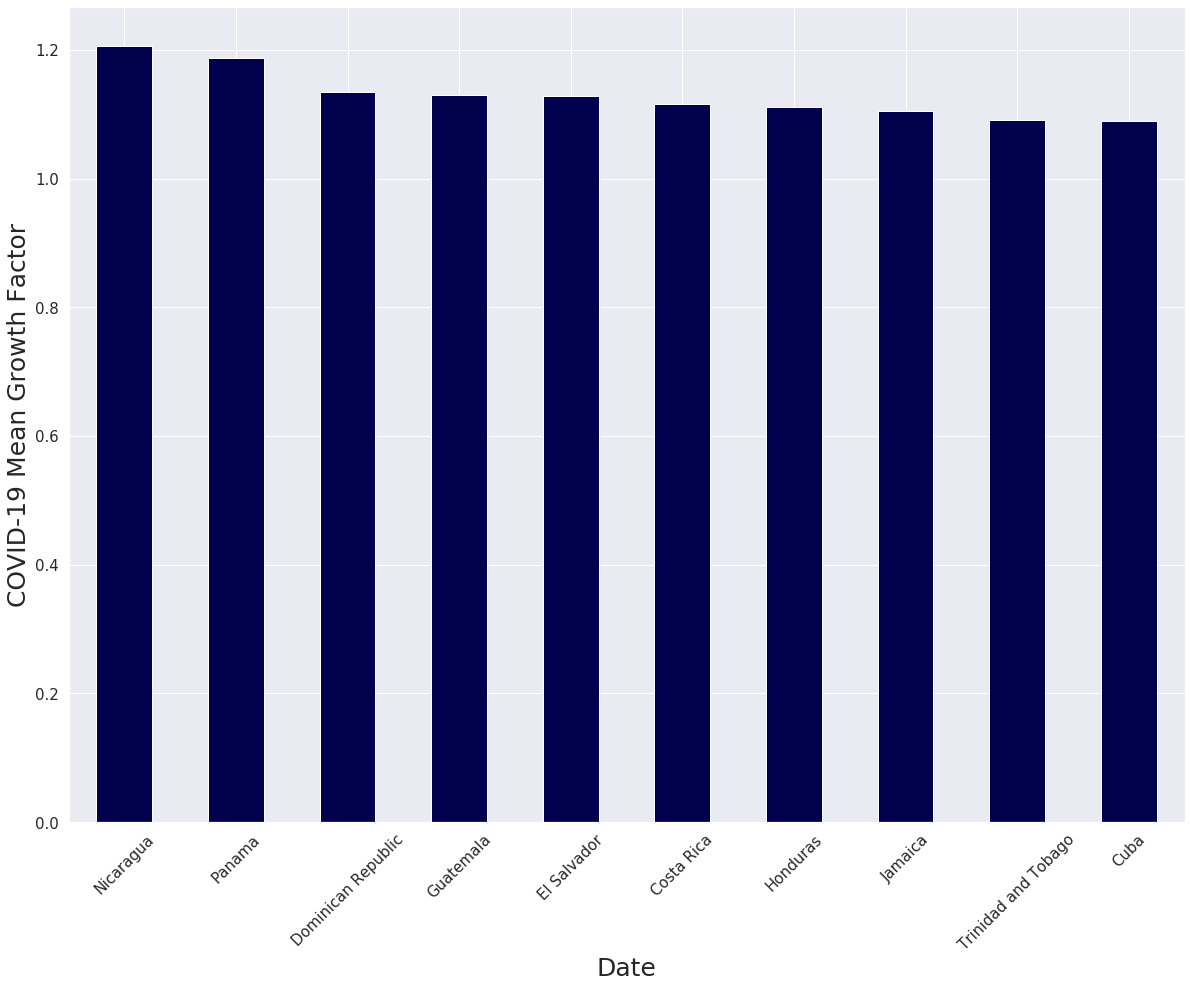

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

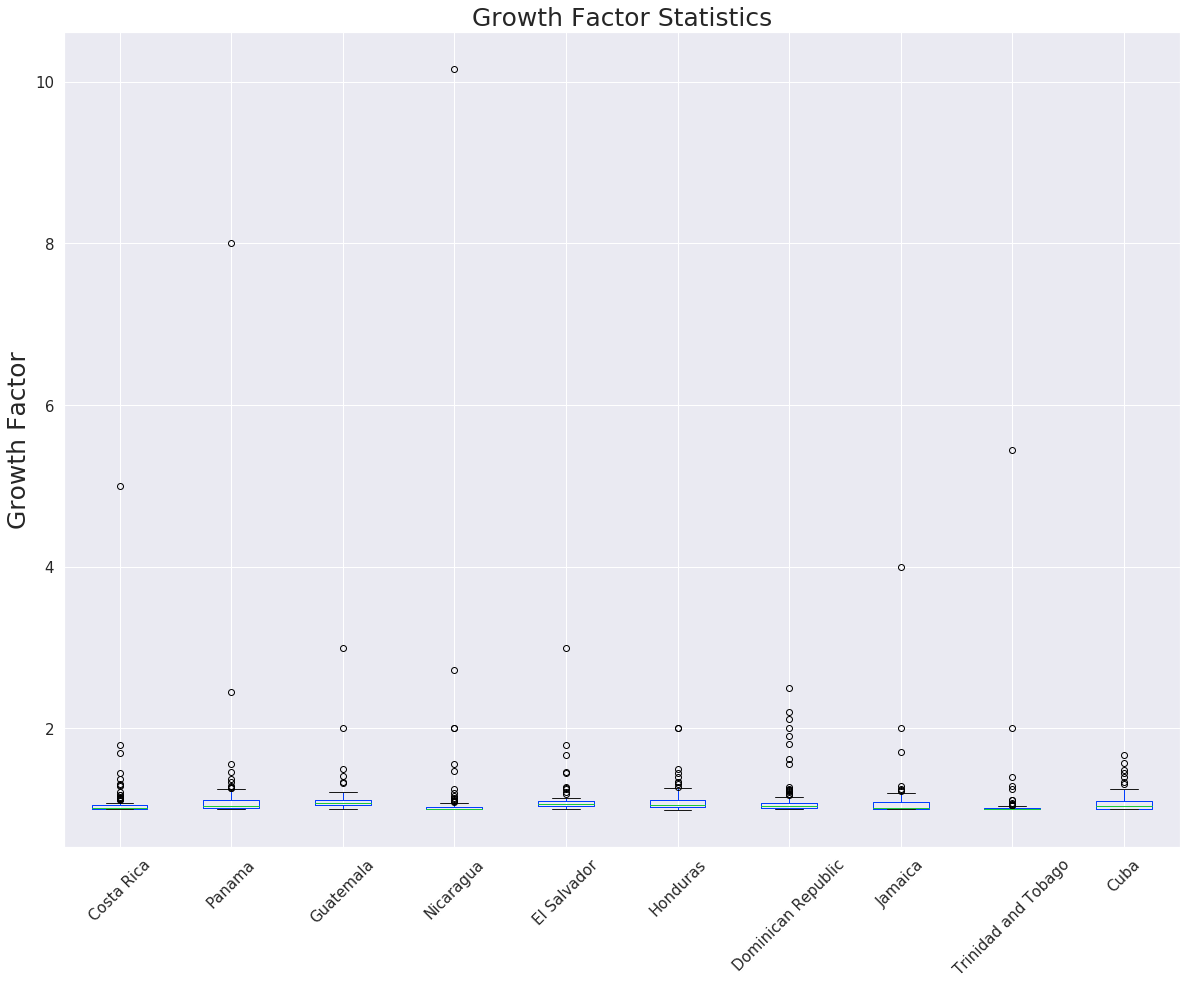

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

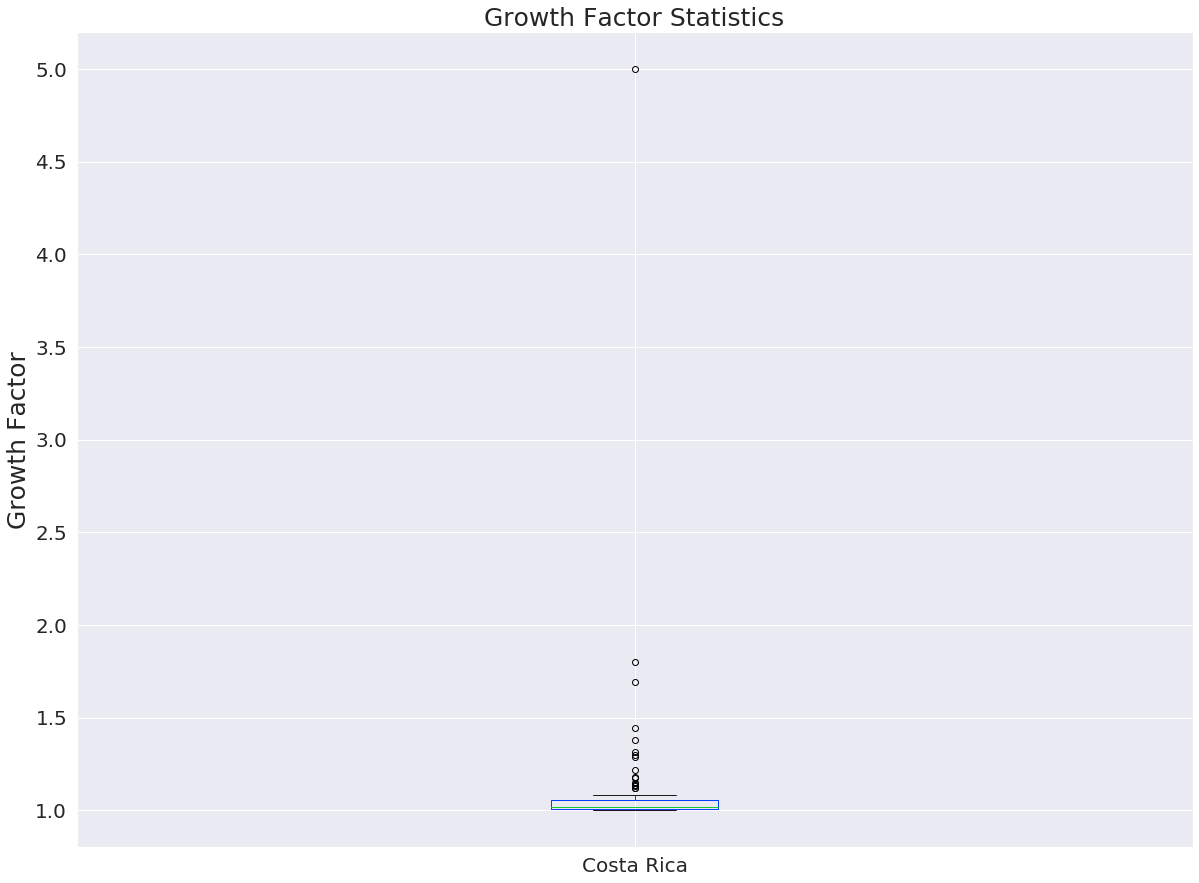

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()